
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number = '400101283'
first_name = 'Kimia'
last_name = 'Ramezan'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [8]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import random


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [22]:
# TODO: Write your code here

df = pd.read_csv('/content/spotify.csv')

print("Column Names in the DataFrame:")
print(df.columns)

relevant_features = [
      'track_name','track_artist', 'track_popularity',
     'playlist_name', 'playlist_genre','playlist_subgenre',
    'danceability','energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'
]
track_name = df['track_name'].to_numpy()
df_relevant = df[relevant_features]
data = df_relevant.copy()
print("\nDataFrame with Relevant Features:")
display(df_relevant.head())
cols_name = df_relevant.columns
df_relevant = df_relevant.to_numpy()

Column Names in the DataFrame:
Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

DataFrame with Relevant Features:


,track_name,track_artist,track_popularity,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,Pop Remix,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Pop Remix,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,Pop Remix,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Pop Remix,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Pop Remix,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [10]:
categorical_cols = [0,1,3,4,5]

label_encoder = LabelEncoder()

for col in categorical_cols:
    df_relevant[:,col] = label_encoder.fit_transform(df_relevant[:,col])


print("DataFrame with Encoded Categorical Features:")
df_encoded = df_relevant.astype(np.float64)[:,1:]
print(df_encoded.shape)

DataFrame with Encoded Categorical Features:
(32833, 17)


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

### Importance of Standard Scaling
Standard scaling is crucial in clustering because it ensures that each feature contributes equally to the distance calculations. Without scaling, features with larger ranges can dominate the distance metric, leading to distorted cluster formations. This is particularly important in algorithms like K-Means clustering, where the distance between points is a key factor in determining cluster membership.

### Potential Complications Without Scaling
If standard scaling is not applied:

Features with larger ranges can overshadow features with smaller ranges.
Clusters may be skewed towards features with higher magnitudes.
The algorithm might fail to detect meaningful clusters, leading to poor clustering performance.

In [11]:
# TODO: Write your code here
def standard_scaler(data):

    means = data.mean(axis=0)
    stds = data.std(axis=0)
    standardized_data = (data - means) / stds
    return standardized_data

df_standardized = standard_scaler(df_encoded)
print(df_standardized.shape)

(32833, 17)


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.


Number of components to retain for 80.0% variance: 12


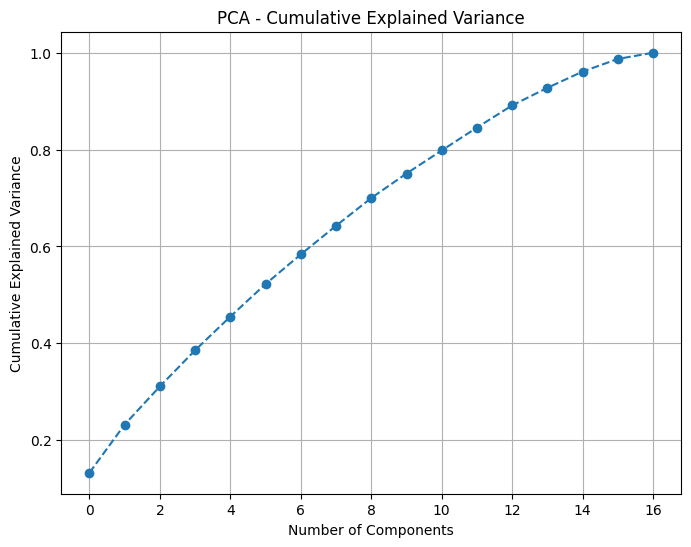

(32833, 12)

In [12]:
cutoff = 0.80

pca = PCA()
X_pca = pca.fit_transform(df_standardized)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= cutoff) + 1

print(f"\nNumber of components to retain for {cutoff * 100}% variance: {n_components}")

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(df_standardized)
X_reduced.shape

# Clustering

Implement K-means for clustering from scratch.

In [13]:
def initialize_centroids_kmeans_plus_plus(X, k):
    """
    Initialize k centroids using the K-means++ algorithm.
    """
    m, n = X.shape
    centroids = np.zeros((k, n))

    centroids[0] = X[np.random.randint(m)]

    distances = np.linalg.norm(X - centroids[0], axis=1)

    for i in range(1, k):
        probabilities = distances ** 2 / np.sum(distances ** 2)
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        next_centroid_idx = np.searchsorted(cumulative_probabilities, r)
        centroids[i] = X[next_centroid_idx]

        new_distances = np.linalg.norm(X - centroids[i], axis=1)
        distances = np.minimum(distances, new_distances)

    return centroids

def assign_clusters(X, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """
    Update the centroids based on the mean of the points assigned to each cluster.
    """
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iters=1000, tol=1e-5):
    """
    Perform K-means clustering on the dataset X.
    """
    centroids = initialize_centroids_kmeans_plus_plus(X, k)

    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            print(f"Converged after {i+1} iterations")
            break

        centroids = new_centroids

    wss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)

    silhouette = silhouette_score(X, labels)

    return labels, centroids , wss , silhouette

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.


K-means with 2 clusters:
Converged after 34 iterations

K-means with 3 clusters:
Converged after 29 iterations

K-means with 4 clusters:
Converged after 48 iterations

K-means with 5 clusters:
Converged after 53 iterations

K-means with 6 clusters:
Converged after 258 iterations

K-means with 7 clusters:
Converged after 70 iterations

K-means with 8 clusters:
Converged after 59 iterations

K-means with 9 clusters:
Converged after 61 iterations


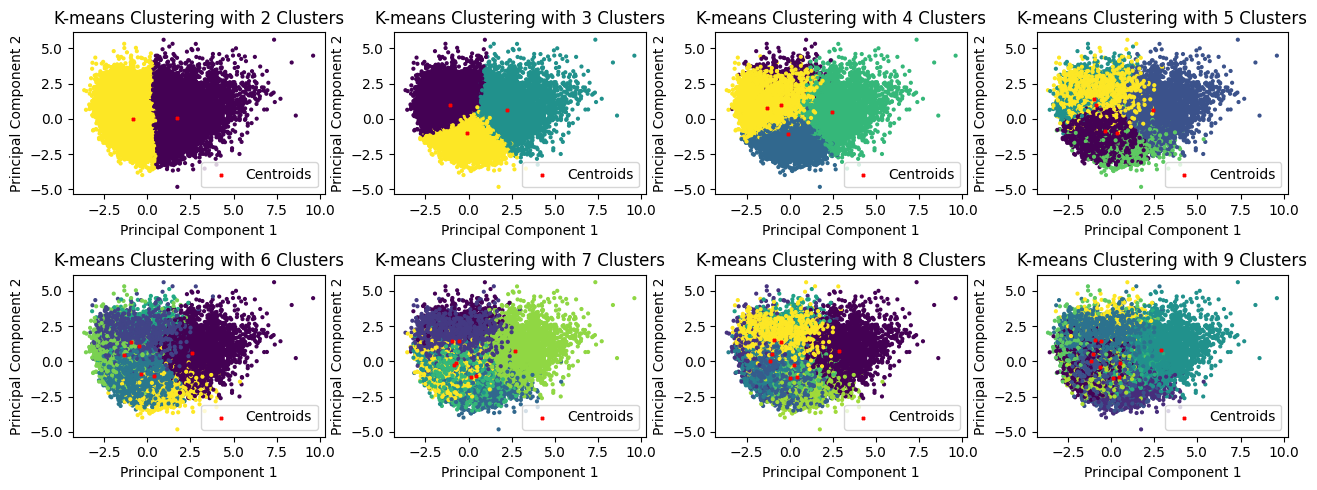

In [14]:
# TODO: Write your code here

cluster_range = range(2, 10)

silhouette_scores = []
wss_scores = []
clusters = np.zeros((len(cluster_range), X_reduced.shape[0]))

num_plots = len(cluster_range)
fig, axes = plt.subplots(2, 4, figsize=(13, 5))
axes = axes.flatten()

for idx, k in enumerate(cluster_range):
    print(f"\nK-means with {k} clusters:")
    labels, centroids , wss , silhouette = kmeans(X_reduced, k)

    silhouette_scores.append(silhouette)
    wss_scores.append(wss)

    clusters[idx, :] = labels

    ax = axes[idx]
    ax.scatter(X_reduced[:,0], X_reduced[:,1], c=labels,s=4)
    ax.scatter(centroids[:, 0], centroids[:, 1], s=4, c='red', marker='X', label='Centroids')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'K-means Clustering with {k} Clusters')
    ax.legend()

plt.tight_layout()
plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

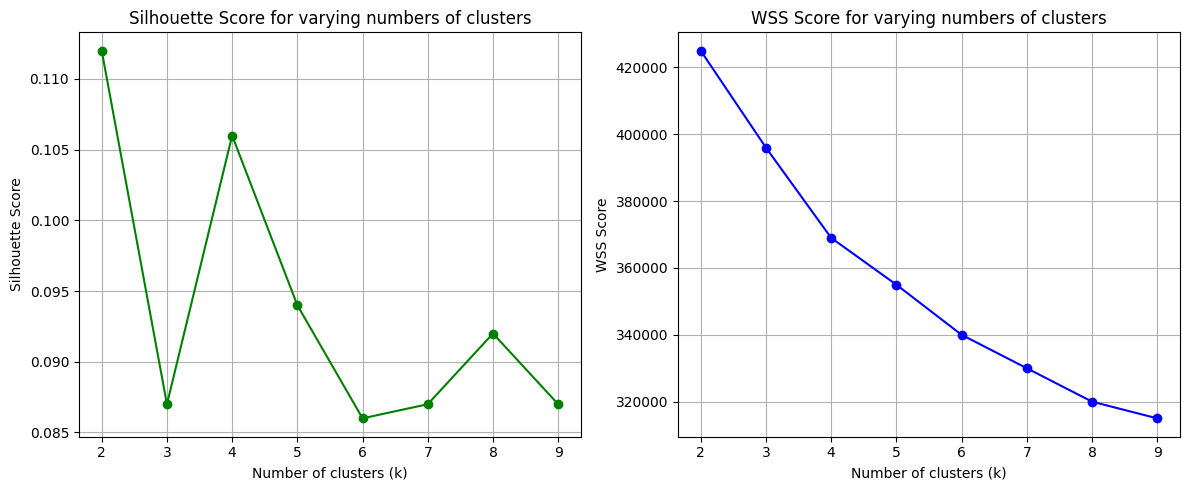

Based on the plot the optimal number of clusters k is 4.


In [29]:
# TODO: Write your code here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(cluster_range,silhouette_scores , 'g-o')
ax1.set_title('Silhouette Score for varying numbers of clusters')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Silhouette Score')
ax1.grid()

ax2.plot(cluster_range,wss_scores, 'b-o')
ax2.set_title('WSS Score for varying numbers of clusters')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('WSS Score')
ax2.grid()

plt.tight_layout()
plt.show()
print("Based on the plot the optimal number of clusters k is 4.")

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [36]:
for k in range(4):
    print(f'cluster {k} two song selected : ')
    cluster_indices = np.where(clusters[2, :] == k)[0]  # Using the 2th row corresponding to k=4
    sample = np.random.choice(cluster_indices, 2)
    display(data.iloc[sample])


cluster 0 two song selected : 


,track_name,track_artist,track_popularity,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
15680,Fortunate Son,Creedence Clearwater Revival,10,Classic Hard Rock,rock,hard rock,0.623,0.529,0,-12.419,1,0.0353,0.1700,0.020100,0.4890,0.603,132.740,138400
13818,Last Nite,The Strokes,72,"Muse Radio - (Uprising, Starlight, Supermassiv...",rock,permanent wave,0.624,0.910,0,-5.703,1,0.0297,0.0285,0.000198,0.0789,0.767,104.042,193051


cluster 1 two song selected : 


,track_name,track_artist,track_popularity,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
16874,Las Avispas,Juan Luis Guerra 4.40,50,TROPICAL🌴,latin,tropical,0.814,0.944,4,-2.758,0,0.0532,0.5440,0.000008,0.0642,0.961,130.082,197333
21968,Moist (feat. K CAMP),Eric Bellinger,55,Chixtape 5 - Tory Lanez,r&b,urban contemporary,0.677,0.691,10,-6.357,0,0.3530,0.0756,0.000000,0.6930,0.350,99.933,200979


cluster 2 two song selected : 


,track_name,track_artist,track_popularity,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
25302,Loyal (feat. Drake),PARTYNEXTDOOR,84,Neo-Soul,r&b,neo soul,0.866,0.530,0,-6.347,0,0.0495,0.517,0.001590,0.0946,0.203,104.952,197973
5480,Pig Latin,Havelock,33,Indie Poptimism,pop,indie poptimism,0.768,0.406,4,-8.578,0,0.0747,0.490,0.000007,0.1050,0.513,87.984,186642


cluster 3 two song selected : 


,track_name,track_artist,track_popularity,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
514,Secrets - Radio Edit,Tiësto,65,Dance Pop,pop,dance pop,0.677,0.811,11,-4.530,0,0.0430,0.0012,0.007610,0.0896,0.185,128.004,216967
4356,Halfway There,ROZES,63,2019 in Indie Poptimism,pop,indie poptimism,0.591,0.743,0,-4.245,0,0.0456,0.0435,0.000731,0.3620,0.251,160.019,207920


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

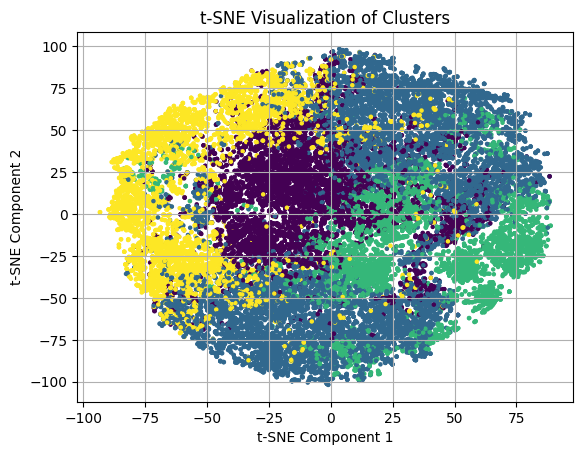

In [40]:

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(X_reduced)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1],c=clusters[2,:],s=5)

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()